In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
df = pd.read_csv('/Users/롸/Desktop/austinHousingData.csv')

In [31]:
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [32]:
df.shape

(15171, 47)

In [33]:
df.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

### Feature Engineering

In [34]:
df.homeType.value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Apartment                   37
Residential                 37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [35]:
df.loc[df.homeType=='Single Family', 'homeType'] = 'house'
df.loc[df.homeType=='Townhouse', 'homeType'] = 'house'
df.loc[df.homeType=='Apartment', 'homeType'] = 'house'

In [36]:
df.loc[df.homeType=='Condo', 'homeType'] = 'condo'

In [37]:
df.loc[df.homeType=='Multiple Occupancy', 'homeType'] = 'other'
df.loc[df.homeType=='Vacant Land', 'homeType'] = 'other'
df.loc[df.homeType=='Residential', 'homeType'] = 'other'
df.loc[df.homeType=='Mobile / Manufactured', 'homeType'] = 'other'
df.loc[df.homeType=='MultiFamily', 'homeType'] = 'other'
df.loc[df.homeType=='Other', 'homeType'] = 'other'

In [38]:
df.homeType.value_counts()

house    14452
condo      470
other      249
Name: homeType, dtype: int64

In [39]:
df.loc[df.parkingSpaces>0, 'parkingSpaces'] = 1

In [40]:
df.parkingSpaces.value_counts()

1    8310
0    6861
Name: parkingSpaces, dtype: int64

In [41]:
df['hasParking'] = df['parkingSpaces']
df = df.drop(columns='parkingSpaces')

#### Histogram for the response variable

<AxesSubplot:xlabel='latestPrice', ylabel='Count'>

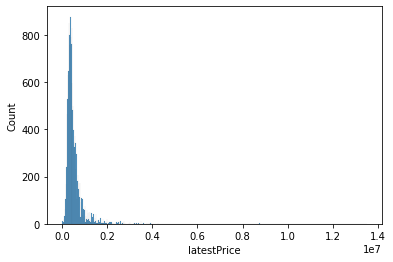

In [42]:
# skewed 
# some outliers 

sns.histplot(df.latestPrice)

### Outlier

In [43]:
thresh = np.percentile(df.latestPrice,90)

In [44]:
df = df.loc[df.latestPrice<thresh]

In [45]:
# homeType - room_type 
# hasCooling - amenities
# hasHeating - amenities
# hasParking (parkingspaces) - amenities (paid parking) : has parking or not 
# numOfBathrooms
# numOfBedrooms

In [46]:
df = df[['hasParking', 'hasCooling','hasHeating', 'numOfBathrooms', 'numOfBedrooms', 'homeType','latestPrice']]

In [47]:
df['hasCooling'] = df['hasCooling'].astype(int)
df['hasHeating'] = df['hasHeating'].astype(int)

In [48]:
df.head()

,hasParking,hasCooling,hasHeating,numOfBathrooms,numOfBedrooms,homeType,latestPrice
0,1,1,1,3.0,4,house,305000.0
1,1,1,1,2.0,4,house,295000.0
2,0,1,1,2.0,3,house,256125.0
3,1,1,1,2.0,3,house,240000.0
4,0,1,1,3.0,3,house,239900.0


In [49]:
dumm = df[['hasParking', 'hasCooling','hasHeating','homeType']]

dummies = pd.get_dummies(dumm)
dummies

,hasParking,hasCooling,hasHeating,homeType_condo,homeType_house,homeType_other
0,1,1,1,0,1,0
1,1,1,1,0,1,0
2,0,1,1,0,1,0
3,1,1,1,0,1,0
4,0,1,1,0,1,0
...,...,...,...,...,...,...
15165,1,1,1,0,1,0
15166,1,1,1,0,1,0
15167,1,1,1,0,1,0
15169,0,1,1,0,0,1


<AxesSubplot:xlabel='latestPrice', ylabel='Count'>

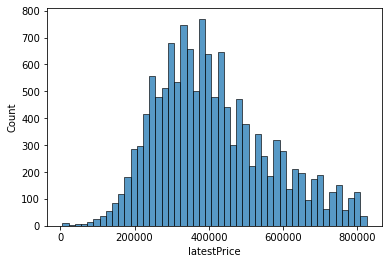

In [50]:
# histogram of the response variable after removing outliers
# almost normal distribution 
sns.histplot(df.latestPrice)

In [51]:
df = pd.concat([dummies,df[['numOfBathrooms','numOfBedrooms','latestPrice']]], axis=1)

In [52]:
from sklearn.model_selection import train_test_split

x = df.drop(['latestPrice'], axis=1) # drop variables
y = df['latestPrice'] # target


# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8) 

In [53]:
X_train

,hasParking,hasCooling,hasHeating,homeType_condo,homeType_house,homeType_other,numOfBathrooms,numOfBedrooms
9143,1,1,1,0,1,0,2.0,4
11078,0,1,1,0,1,0,2.0,3
609,1,1,1,0,1,0,2.0,3
2401,0,1,1,0,1,0,4.0,4
6567,0,1,1,0,1,0,2.0,3
...,...,...,...,...,...,...,...,...
8047,1,1,1,0,1,0,3.0,4
1504,1,1,1,0,1,0,5.0,5
4014,1,1,1,0,1,0,2.0,3
8918,1,1,1,0,1,0,3.0,3


In [54]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting and printing coefficients
lm.fit(X_train_norm, y_train)
print("Coefficients: \n", lm.coef_)


Coefficients: 
 [ 2.16631401e+04 -4.27148396e+04  5.40527252e+04  2.13686865e+18
  2.13686865e+18  2.13686865e+18  1.40702614e+06  1.49324836e+05]


In [56]:
# Predicting
predictions = lm.predict(X_test_norm)

<AxesSubplot:ylabel='Count'>

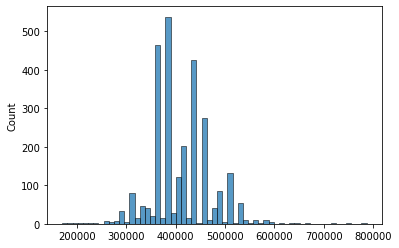

In [57]:
# histogram of predictions
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(predictions)

In [58]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 111882.54792508263
MSE: 19994164436.985676
RMSE: 141400.7229012132


In [59]:
print('MSE:', metrics.mean_absolute_error(y_test, [y_train.mean()]*len(y_test)))

MSE: 123437.6844256001


### Training on the whole dataset

In [60]:
whole_train = pd.concat([X_train, X_test], axis=0)
whole_test = pd.concat([y_train, y_test], axis=0)

In [61]:
whole_train

,hasParking,hasCooling,hasHeating,homeType_condo,homeType_house,homeType_other,numOfBathrooms,numOfBedrooms
9143,1,1,1,0,1,0,2.0,4
11078,0,1,1,0,1,0,2.0,3
609,1,1,1,0,1,0,2.0,3
2401,0,1,1,0,1,0,4.0,4
6567,0,1,1,0,1,0,2.0,3
...,...,...,...,...,...,...,...,...
15023,1,1,1,0,1,0,2.0,4
12407,0,1,1,0,1,0,3.0,3
3890,0,1,1,0,1,0,2.0,4
7988,1,1,1,0,1,0,3.0,5


In [62]:
whole_test

9143     429000.0
11078    209950.0
609      459500.0
2401     699000.0
6567     240000.0
           ...   
15023    649900.0
12407    355000.0
3890     314900.0
7988     660000.0
11055    220000.0
Name: latestPrice, Length: 13613, dtype: float64

In [63]:
model = lm.fit(whole_train, whole_test)

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [67]:
whole_train.head()

,hasParking,hasCooling,hasHeating,homeType_condo,homeType_house,homeType_other,numOfBathrooms,numOfBedrooms
9143,1,1,1,0,1,0,2.0,4
11078,0,1,1,0,1,0,2.0,3
609,1,1,1,0,1,0,2.0,3
2401,0,1,1,0,1,0,4.0,4
6567,0,1,1,0,1,0,2.0,3


In [69]:
whole_df = pd.concat([whole_train, whole_test], axis=1)

In [70]:
whole_df.head()

,hasParking,hasCooling,hasHeating,homeType_condo,homeType_house,homeType_other,numOfBathrooms,numOfBedrooms,latestPrice
9143,1,1,1,0,1,0,2.0,4,429000.0
11078,0,1,1,0,1,0,2.0,3,209950.0
609,1,1,1,0,1,0,2.0,3,459500.0
2401,0,1,1,0,1,0,4.0,4,699000.0
6567,0,1,1,0,1,0,2.0,3,240000.0


In [72]:
# final model 

mod = smf.ols(formula='latestPrice ~ hasParking + hasCooling + hasHeating + homeType_condo + homeType_house + homeType_other + numOfBedrooms', data=whole_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          3.14e-244
Time:                        16:05:21   Log-Likelihood:            -1.8128e+05
No. Observations:               13613   AIC:                         3.626e+05
Df Residuals:                   13606   BIC:                         3.626e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         1.5e+05   1.01e+04     14.

In [65]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 2.09478249e+04 -4.37650456e+04  5.17627315e+04 -9.72239357e+17
 -9.72239357e+17 -9.72239357e+17  5.34478620e+04  1.70040909e+04]


In [64]:
# publishing the model 

import pickle 

pickle.dump(model, open('pricemodel.pkl', 'wb'))